In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('/Users/braulio/Documents/data/train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Where are the NaN values?:

In [4]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

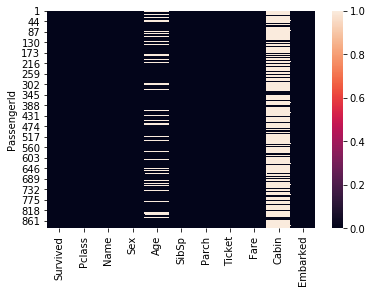

In [5]:
sns.heatmap(df.isna())

### Fix missing values on dataset

* easy: impute missing values in the age column
* medium: apply one-hot encoding
* hard: bin the age column

#### Exploring age avgs by sub-categories:

In [6]:
df['Age'].mean()

29.69911764705882

In [7]:
df['Age'].median()

28.0

In [8]:
df[df["Pclass"]==1]["Age"].mean()

38.233440860215055

In [9]:
df[df["Pclass"]==2]["Age"].mean()

29.87763005780347

In [10]:
df[df["Pclass"]==3]["Age"].mean()

25.14061971830986

In [11]:
df[df["Sex"]=='male']["Age"].mean()

30.72664459161148

In [12]:
df[df["Sex"]=='female']["Age"].mean()

27.915708812260537

#### Imputation

In [13]:
df.groupby('Pclass').transform('mean')['Age']

PassengerId
1      25.140620
2      38.233441
3      25.140620
4      38.233441
5      25.140620
         ...    
887    29.877630
888    38.233441
889    25.140620
890    38.233441
891    25.140620
Name: Age, Length: 891, dtype: float64

In [14]:
df['Age'].fillna(df.groupby('Pclass').transform('mean')['Age'], inplace=True)

In [15]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
df['Age'].mean()

29.29287479027204

In [17]:
df['Age'].median()

26.0

### Sex category into binary

In [20]:
df.groupby('Sex').sum()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,233,678,8745.762256,218,204,13966.6628
male,109,1379,17354.189182,248,136,14727.2865
